In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
import time
import math
import cv2


In [2]:
img = cv2.imread('coins.png')

In [3]:
I = np.array(img)

In [4]:
def histogram(I):

  histogram = np.zeros(256,dtype = 'int')

  for i in I.ravel():
      histogram[i]+=1

  return histogram

In [5]:
def getAvgIntensity(H_img):
  avg_int = 1
  for i in range(len(H_img)):
    avg_int+=(H_img[i]*i)
  avg_int/= sum(H_img)

  return avg_int

In [88]:
# Demo Code
Intial_time = time.time()
H_img = histogram(I)
time_req = time.time() - Intial_time
avg_int = getAvgIntensity(H_img)


In [89]:
H_lib = np.histogram(I.ravel(),bins = range(257))[0]
avg_int_lib = 1
for i in range(len(H_lib)):
  avg_int_lib+=(H_lib[i]*i)
avg_int_lib/= sum(H_lib)

In [90]:
print('Time of computation for histogram is '+str(round(time_req,5))+'s')
print('The average intensity of Image is ' + str(round(avg_int,3)))
print('The average intensity of Image given by Lib Function is ' + str(round(avg_int_lib,3)))

Time of computation for histogram is 0.0748s
The average intensity of Image is 103.305
The average intensity of Image given by Lib Function is 103.305


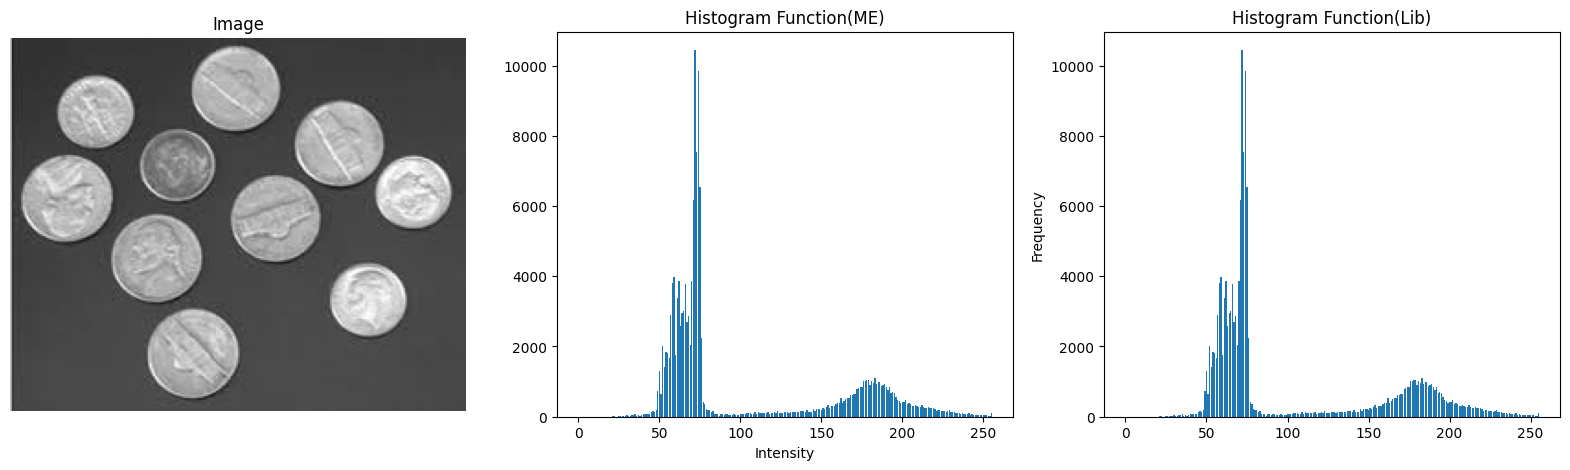

In [91]:
fig, axes = plt.subplots(ncols=3, figsize=(20,5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3)

ax[0].imshow(I, cmap=plt.cm.gray)
ax[0].set_title('Image')
ax[0].axis('off')

ax[1].bar(range(256),histogram(I))
ax[1].set_title('Histogram Function(ME)')
ax[1].set_xlabel('Intensity')
ax[2].set_ylabel('Frequency')

ax[2].bar(range(256),np.histogram(I.ravel(),bins = range(257))[0])
ax[2].set_title('Histogram Function(Lib)')
ax[1].set_xlabel('Intensity')
ax[2].set_ylabel('Frequency')


plt.show()

In [6]:
def within_class_variance(GrayscaleImage,thr):                     #Question 2 part (i)

  
  hist = histogram(GrayscaleImage)    #image histogram

  # Probability Mass Function p(intensity)

  Pmf = hist/np.sum(hist)                                   # probability that a pixel value takes a certain intensity

  # Class Probabilities

  W0 = 0                                                                        # probability that a pixel belongs to class 0 in a binary image
  for k in range(thr+1):
    W0+=Pmf[k]

  W1 = 0                                                                        # probability that a pixel belongs to class 0 in a binary image
  for k in range(thr+1,256):
    W1+=Pmf[k]

  #print(W0)

  if W0!=0 and W1!=0:

    # Class Means

    U0 = 0                                                                     # mean of a pixel belonging to class 0 in a binary image
    for k in range(thr+1):
      U0+= k*Pmf[k]
    U0*=(1/W0)

    U1 = 0                                                                     # mean of a pixel belonging to class 1 in a binary image
    for k in range(thr+1,256):
      U1+= k*Pmf[k]
    U1*=(1/W1)

    UT =  U0*W0+ U1*W1                                                       # overall image mean

    # Class Variances

    Sigma_Square0 = 0                                                           # Class Variance of class 0
    for k in range(thr+1):
      Sigma_Square0+= (k-U0)**2 * Pmf[k]
    Sigma_Square0*=(1/W0)

    Sigma_Square1 = 0                                                           # Class Variance of class 1
    for k in range(thr+1,256):
      Sigma_Square1+= (k-U1)**2 * Pmf[k]
    Sigma_Square1*=(1/W1)

    intra_class_variance = (Sigma_Square0*W0) + (Sigma_Square1*W1)

  else:
    intra_class_variance = 2**32

  return intra_class_variance


In [7]:
#Question 2 part (ii)
def between_class_variance(GrayscaleImage,thr):

  
  hist = histogram(GrayscaleImage)    #image histogram

  # Probability Mass Function p(intensity)

  Pmf = hist/np.sum(hist)      #probability that a pixel value takes a certain intensity

  # Class Probabilities

  W0 = 0                      #probability that a pixel belongs to class 0 in a binary image
  for k in range(thr+1):
    W0+=Pmf[k]

  W1 = 0                      #probability that a pixel belongs to class 0 in a binary image
  for k in range(thr+1,256):
    W1+=Pmf[k]

  #print(w0)

  if W0!=0 and W1!=0:

    # Class Means

    U0 = 0                    #mean of a pixel belonging to class 0 in a binary image
    for k in range(thr+1):
      U0+= k*Pmf[k]
    U0*=(1/W0)

    U1 = 0                    #mean of a pixel belonging to class 1 in a binary image
    for k in range(thr+1,256):
      U1+= k*Pmf[k]
    U1*=(1/W1)

    UT =  U0*W0+ U1*W1      #overall image mean

    inter_class_variance = W0 * W1 * (U0 - U1)**2

  else:
    inter_class_variance = 0

  return inter_class_variance


In [12]:
def threshold_using_between_class_variance(image):
    between_class_variance_array = [
        between_class_variance(image, t) for t in range(256)
    ]

    t_between_class = np.argmax(between_class_variance_array)
    return t_between_class                                          # calculating the threshold value

def threshold_using_within_class_variance(image):
    within_class_variance_array = [
        within_class_variance(image, t) for t in range(256)
    ]

    t_within_class = np.argmin(within_class_variance_array)
    return t_within_class

def binaryy(image, thresh):
    binary = image > thresh
    return binary.astype(float)    # this fnc return the binaray image

In [14]:
V = threshold_using_between_class_variance(Img)
print('the value of optimal threhsold by between variance'  +  str(V))

O = threshold_using_within_class_variance(Img)
print('the value of optimal threhsold by within class variance' +  str(O))


the value of optimal threhsold by between variance125
the value of optimal threhsold by within class variance125


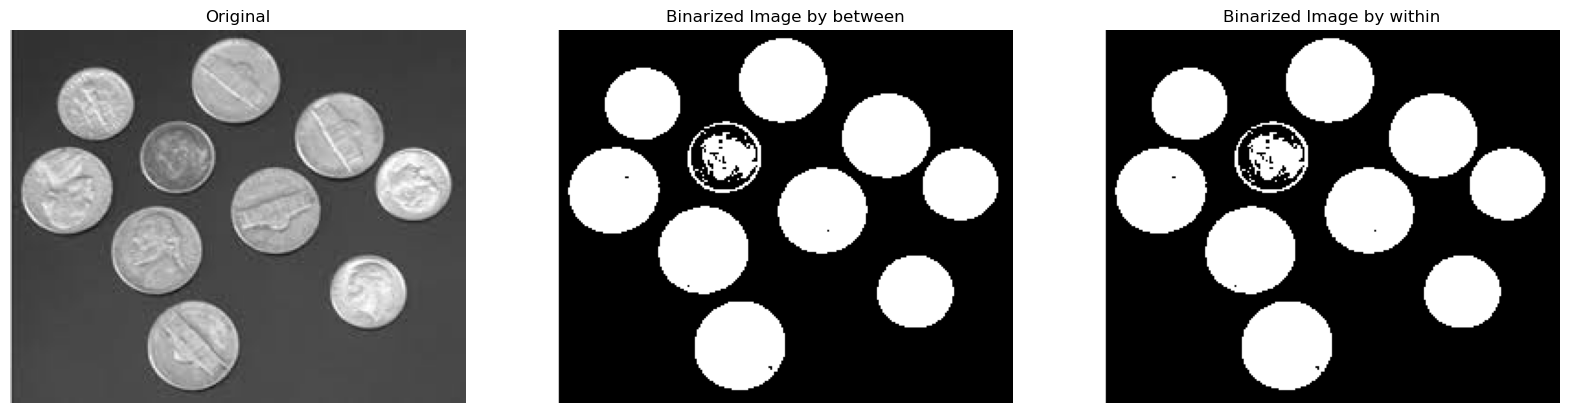

In [18]:
Img = cv2.imread('coins.png')
thr_b = threshold_using_between_class_variance(Img)    #threshold
thr_w = threshold_using_within_class_variance(Img)  

bin_b = binaryy(Img,thr_b)   #binaray image by between variance 
bin_w = binaryy(Img,thr_w )


# Create a figure with 3 subplots
fig, axes = plt.subplots(ncols=3, figsize=(20, 8))

# Plot the original image
axes[0].imshow(Img, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

# Plot the histogram of the image
axes[1].imshow(bin_b,cmap='gray')
axes[1].set_title('Binarized Image by between')
axes[1].axis('off')

# Plot the binarized image
axes[2].imshow(bin_w, cmap='gray')
axes[2].set_title('Binarized Image by within')
axes[2].axis('off')

# Display the plots
plt.show()


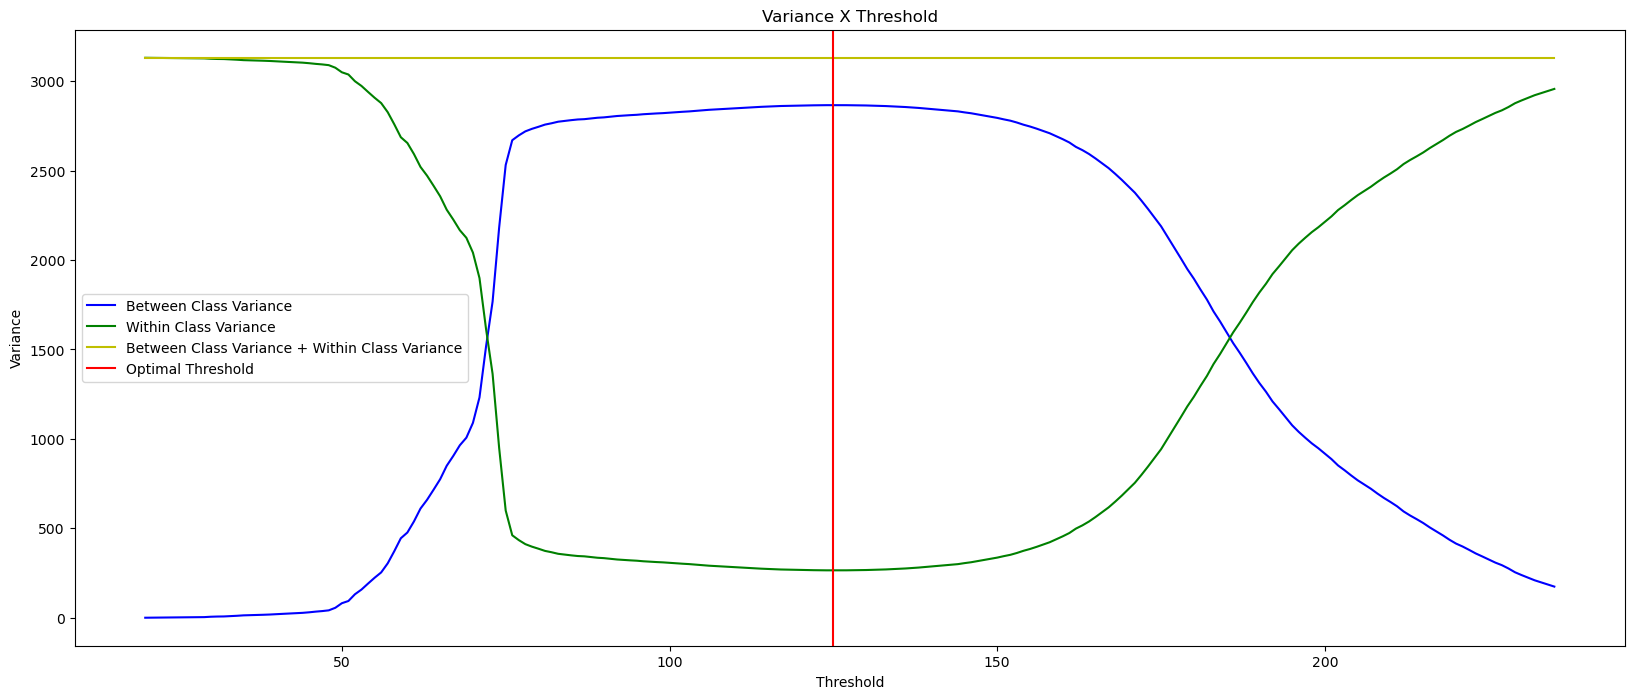

In [17]:
x = np.arange(256)
between_class_variance_array = [
    between_class_variance(Img, t) for t in range(256)
]

within_class_variance_array = [
    within_class_variance(Img, t) for t in range(256)
]

plt.figure(figsize=(20, 8))

# Adding labels and title
plt.xlabel('Threshold')
plt.ylabel('Variance')
plt.title('Variance X Threshold')

plt.plot(x[20:-20], np.array(between_class_variance_array)[20:-20], color = 'b', label='Between Class Variance')
plt.plot(x[20:-20], np.array(within_class_variance_array)[20:-20], color = 'g', label='Within Class Variance')
plt.plot(x[20:-20], (np.array(between_class_variance_array) +  np.array(within_class_variance_array))[20:-20], color = 'y', label = "Between Class Variance + Within Class Variance")
plt.axvline(B, color='r', label = "Optimal Threshold")

plt.legend()  
plt.show()

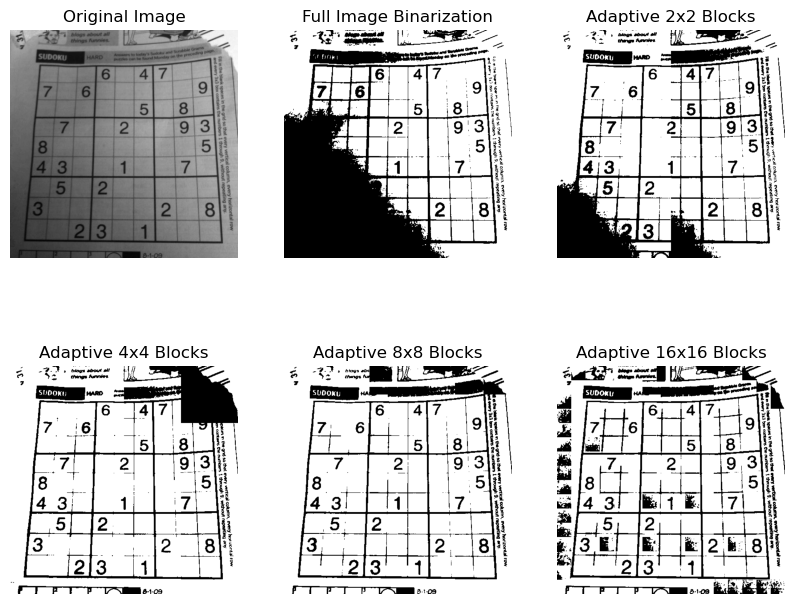

In [26]:
# Question 3 part a and  part b(i),(ii),(iii)
Ima = cv2.imread('sudoku.png', cv2.IMREAD_GRAYSCALE)
def adaptive_binarization(Img, N):
    bh = Img.shape[0] // N
    bw=  Img.shape[1] // N

    P = np.zeros_like(Img)
    for i in range(N):
        for j in range(N):
            start_row = i * bh
            end_row = (i+1)*bh
            start_col = j * bw
            end_col = (j+1)*bw  # Corrected end_col calculation

            block = Img[start_row:end_row, start_col:end_col]  # Corrected from 'image' to 'Img'

            # Assuming `bin` is a function that computes a threshold for the block
            thr = threshold_using_between_class_variance(block)
            binarized_block = block > thr
            binarized_block = binarized_block.astype(Img.dtype)

            P[start_row:end_row, start_col:end_col] = binarized_block

    return P


entire_image = adaptive_binarization(Ima, 1)


block_sizes = [2, 4, 8, 16]
results = []

for N in block_sizes:
    adaptive_binarized = adaptive_binarization(Ima, N)
    results.append(adaptive_binarized)

# Plotting the results using matplotlib
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(Ima, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Full Image Binarization')
plt.imshow(entire_image, cmap='gray')
plt.axis('off')

for i in range(len(results)):
  plt.subplot(2, 3, 3 + i)
  plt.title('Adaptive ' + str(block_sizes[i]) + 'x' + str(block_sizes[i]) + ' Blocks')
  plt.imshow(results[i], cmap='gray')
  plt.axis('off')

Total number of characters (excluding punctuations): 64




(-0.5, 673.5, 609.5, -0.5)

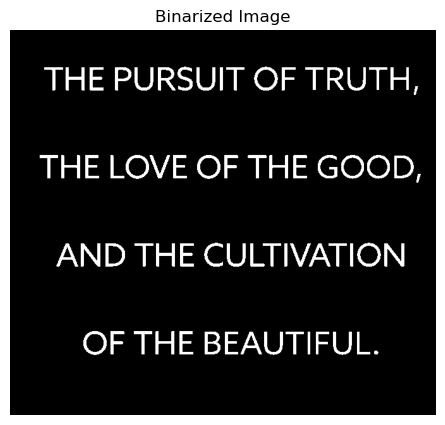

In [28]:
image = cv2.imread('quote.png', cv2.IMREAD_GRAYSCALE)

# Apply Otsu's binarization by calling my function
adaptive_threshold =  threshold_using_between_class_variance(image)
binary_image = binaryy(image,adaptive_threshold)
binary_image = 1 - binary_image

height, width = binary_image.shape

labels = np.zeros_like(binary_image, dtype=np.int32)

# Initialize the label counter
current_label = 0

# Define the 8-neighbour relative positions
neighbours = [(-1, 0), (-1, -1), (0, -1), (1, -1), (1, 0), (1, 1), (0, 1), (-1, 1)]

# Function to perform flood-fill using 8-neighbour connectivity
def flood_fill(x, y):
    stack = [(x, y)]
    labels[x, y] = current_label

    while stack:
        cx, cy = stack.pop()

        for dx, dy in neighbours:
            nx, ny = cx + dx, cy + dy

            if 0 <= nx < height and 0 <= ny < width and binary_image[nx, ny] == 1 and labels[nx, ny] == 0:
                labels[nx, ny] = current_label
                stack.append((nx, ny))

# Iterate over each pixel in the image
for i in range(height):
    for j in range(width):
        if binary_image[i, j] == 1 and labels[i, j] == 0:  # If pixel is part of a new component
            current_label += 1
            flood_fill(i, j)

# Count the size of each connected component
component_sizes = np.bincount(labels.flatten())

# Filter out small components (likely punctuations)
char_count = np.sum(component_sizes > 100)  # Adjust the threshold as needed

# Exclude the background component (label 0)
char_count -= 1  # Subtract 1 for the background

print(f"Total number of characters (excluding punctuations): {char_count}")
print()
print()

plt.figure(figsize=(7, 5))

plt.title('Binarized Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')